In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2,fft
from scipy.fftpack import ifft2,ifft
from scipy.fftpack import fftfreq
from scipy.fftpack import fftshift,ifftshift
from scipy.signal import find_peaks
from scipy.special import jn, spherical_jn,lpmv
import time

In [2]:
def Optica(U0,X,Y,z,lamb):
    A = fft2(U0)
    
    kx = 2*np.pi*fftfreq(len(X[0]), abs(X[0][0]-X[0][1]))
    
    Kx,Ky = np.meshgrid(kx,kx)
    
    K = 2*np.pi/lamb
  
    return ifft2(A*np.exp(1j*z*np.sqrt( K**2-Kx**2-Ky**2 ) ))

def Optica(U0,X,Y,z,lamb):
    A = ifftshift(fft2(fftshift(U0)))
    
    Lx = np.max(X)
    Ly= np.max(Y)

    deltax = 2*Lx/len(U0)
    deltay = 2*Ly/len(U0)    

    fx = fftshift( fftfreq(len(U0),deltax) )  
    fy = fftshift( fftfreq(len(U0),deltay) )   
    
    Fx,Fy = np.meshgrid(fx,fy)
    K = 2*np.pi/lamb

    # Handle cases where u is negative
    u = K**2-(2*np.pi*Fx)**2-(2*np.pi*Fy)**2
    sqrt_u = 1j*z*np.sqrt(abs(u))
    sqrt_u[np.where(u<0)] = 1j*sqrt_u[np.where(u<0)]

    return  ifftshift( ifft2( fftshift( A*np.exp(sqrt_u) ) ) )


def FiguraOptica(U0,X,Y,lamb,z):
  Z=[]

  for i in range(len(z)):
    U = Optica(U0,X,Y,z[i],lamb)
    Z.append( abs(U[len(U)//2])**2 )
  return Z

# For a circle

In [3]:
N = 5000
R1 = 2
lamb = 0.632*10**(-3)
z = 200
vard = [1,2,3,4,5,6,7,8,9,10,15]
UU = []
time_v = []

for i in range(len(vard)):
    start_time = time.time()
    x = np.linspace(-vard[i]*R1,vard[i]*R1,N, endpoint=False)
    X,Y = np.meshgrid(x,x)
    A = (X**2+Y**2>R1**2).astype(float)
    U = Optica(A,X,Y,z,lamb)
    end_time=time.time()
    time_v.append(end_time-start_time)

    UU.append(U)

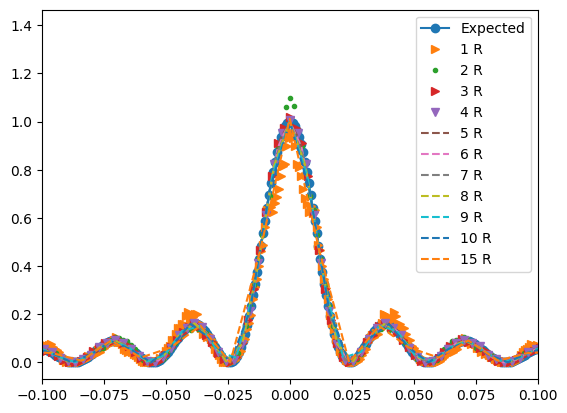

In [4]:
U1,U15,U2,U25,U3,U35,U4,U115,U225 = abs(UU[0])**2,abs(UU[1])**2,abs(UU[2])**2,abs(UU[3])**2,abs(UU[4])**2,abs(UU[5])**2,abs(UU[6])**2,abs(UU[9])**2,abs(UU[10])**2
U45,U5 = abs(UU[7])**2,abs(UU[8])**2
x = np.linspace(-vard[0]*R1,vard[0]*R1,N)
r = 2*R1*np.pi/(lamb*z)*x
J = (z**2)*(jn(0,r))**2 /(z**2+R1**2)

plt.plot(x,J,'-o',label='Expected')


x = np.linspace(-vard[0]*R1,vard[0]*R1,N)
plt.plot(x, U1[N//2],'>',label='1 R')


x = np.linspace(-vard[1]*R1,vard[1]*R1,N,endpoint=False)
plt.plot(x, U15[N//2],'.',label='2 R')
x = np.linspace(-vard[2]*R1,vard[2]*R1,N,endpoint=False)
plt.plot(x, U2[N//2],'>',label='3 R')
x = np.linspace(-vard[3]*R1,vard[3]*R1,N,endpoint=False)
plt.plot(x, U25[N//2],'v',label='4 R')
x = np.linspace(-vard[4]*R1,vard[4]*R1,N,endpoint=False)
plt.plot(x, U3[N//2],'--',label='5 R')
x = np.linspace(-vard[5]*R1,vard[5]*R1,N,endpoint=False)
plt.plot(x, U35[N//2],'--',label='6 R')
x = np.linspace(-vard[6]*R1,vard[6]*R1,N,endpoint=False)
plt.plot(x, U4[N//2],'--',label='7 R')
x = np.linspace(-vard[7]*R1,vard[7]*R1,N,endpoint=False)
plt.plot(x, U45[N//2],'--',label='8 R')
x = np.linspace(-vard[8]*R1,vard[8]*R1,N,endpoint=False)
plt.plot(x, U5[N//2],'--',label='9 R')
x = np.linspace(-vard[9]*R1,vard[9]*R1,N,endpoint=False)
plt.plot(x, U115[N//2],'--',label='10 R')
x = np.linspace(-vard[10]*R1,vard[10]*R1,N,endpoint=False)
plt.plot(x, U225[N//2],'--',label='15 R')

plt.xlim(-0.1,0.1)
plt.legend()

In [5]:
# Function to compute the mean error
def compute_mean_error(x, U,J):
    filtered_indices = np.where(abs(x) < 0.06 )[0]  # Filter indices where x < 0.1
    filtered_U = (J[filtered_indices]-U[filtered_indices])/J[filtered_indices]  # Filter corresponding values of U
    return np.mean(abs(filtered_U)), np.std(abs(filtered_U))/np.sqrt(len(filtered_U))  # Compute mean error

# Initialize empty list to store mean errors
dmean_errors = []
dmean_std = []

# Loop over different values of N and compute mean error
for u in range(len(vard)):
    x = np.linspace(-vard[u] * R1, vard[u] * R1, N, endpoint=False)
    r = 2 * R1 * np.pi / (lamb * z) * x
    J = (z ** 2) * (jn(0, r)) ** 2 / (z ** 2 + R1 ** 2)

    if u == 0:
        err,std = compute_mean_error(x, U1[N // 2 ],J)
    elif u == 1:
        err,std= compute_mean_error(x, U15[N // 2 ],J)
    elif u == 2:
        err,std = compute_mean_error(x, U2[N // 2 ],J)
    elif u == 3:
        err,std= compute_mean_error(x, U25[N // 2 ],J)
    elif u == 4:
        err,std = compute_mean_error(x, U3[N // 2 ],J)
    elif u == 5:
        err,std = compute_mean_error(x, U35[N // 2 ],J)
    elif u == 6:
        err,std = compute_mean_error(x, U4[N // 2 ],J)
    elif u == 7:
        err,std = compute_mean_error(x, U45[N // 2 ],J)
    elif u == 8:
        err,std = compute_mean_error(x, U5[N // 2 ],J)
    elif u == 9:
        err,std = compute_mean_error(x, U115[N // 2 ],J)
    elif u == 10:
        err,std = compute_mean_error(x, U225[N // 2 ],J)

    dmean_errors.append(err)
    dmean_std.append(std)


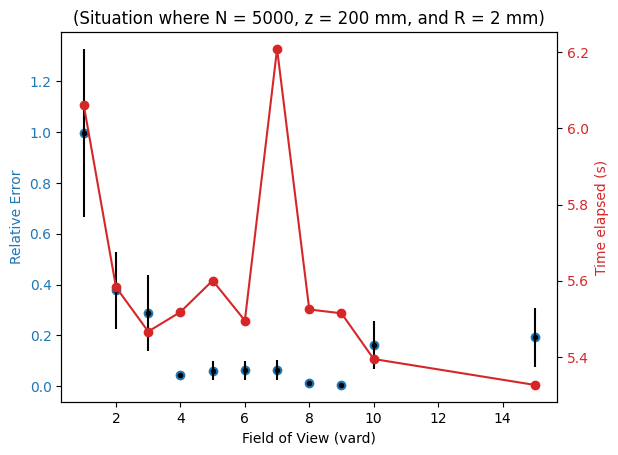

In [6]:
# Create the first plot with y1 data
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Field of View (vard)')
ax1.set_ylabel('Relative Error', color=color)
ax1.plot(vard, dmean_errors,'o', color=color)
ax1.errorbar(vard,dmean_errors, yerr=dmean_std, fmt='.k')
ax1.tick_params(axis='y', labelcolor=color)

# Create the secondary y-axis for y2 data
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Time elapsed (s)', color=color)
ax2.plot(vard, np.abs(time_v), '-o',color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title(f'(Situation where N = {N}, z = {z} mm, and R = {R1} mm)')

# Show the plot
plt.show()

In [7]:
print(dmean_errors)
print(dmean_std)

[0.9955160374183954, 0.37711060820938674, 0.2880335940716801, 0.04415120936102259, 0.061449786177838674, 0.062151079246309804, 0.06406920485809184, 0.012745624606554297, 0.0065615645775619, 0.162908920045386, 0.1921866241922274]
[0.3314452313414557, 0.15272535589371228, 0.1500394865702544, 0.00917944742219263, 0.03706369522518139, 0.03711250195622924, 0.03822749861123156, 0.003215172129752114, 0.0016130342206837575, 0.09402204153848748, 0.11547353352073074]


**Analise the Grid**

In [8]:
R1 = 2
lamb = 0.632*10**(-3)
z = 200
vard0=9
N = [512,1024,3000,4000,5000,6000,7000]
UU = []

time_N=[]
for i in range(len(N)):
    time_s = time.time()
    x = np.linspace(-vard0*R1,vard0*R1,N[i],endpoint=False)
    X,Y = np.meshgrid(x,x)
    A = (X**2+Y**2>R1**2).astype(float)
    U = Optica(A,X,Y,z,lamb)
    time_e = time.time()
    time_N.append(time_e-time_s)

    UU.append(U)

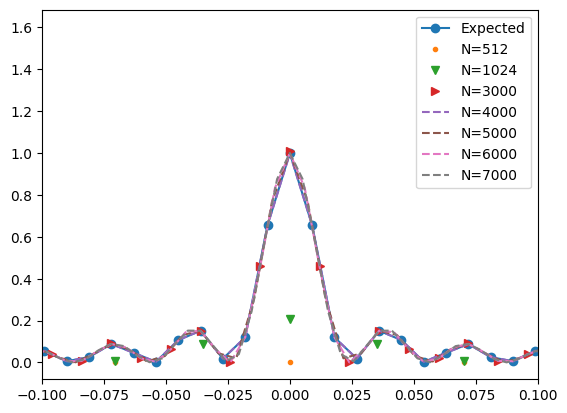

In [9]:
U1,U3,U4,U5,U6,U7,U9 = abs(UU[0])**2,abs(UU[1])**2,abs(UU[2])**2,abs(UU[3])**2, abs(UU[4])**2,abs(UU[5])**2,abs(UU[6])**2


x = np.linspace(-vard0*R1,vard0*R1,N[3],endpoint=False)
r = 2*R1*np.pi/(lamb*z)*x
J = (z**2)*(jn(0,r))**2 /(z**2+R1**2)

plt.plot(x,J,'-o',label='Expected')


x = np.linspace(-vard0*R1,vard0*R1,N[0],endpoint=False)
plt.plot(x, U1[N[0]//2],'.',label=f'N={N[0]}')

x = np.linspace(-vard0*R1,vard0*R1,N[1],endpoint=False)
plt.plot(x, U3[N[1]//2],'v',label=f'N={N[1]}')

x = np.linspace(-vard0*R1,vard0*R1,N[2],endpoint=False)
plt.plot(x, U4[N[2]//2],'>',label=f'N={N[2]}')

x = np.linspace(-vard0*R1,vard0*R1,N[3],endpoint=False)
plt.plot(x, U5[N[3]//2],'--',label=f'N={N[3]}')

x = np.linspace(-vard0*R1,vard0*R1,N[4],endpoint=False)
plt.plot(x, U6[N[4]//2],'--',label=f'N={N[4]}')

x = np.linspace(-vard0*R1,vard0*R1,N[5],endpoint=False)
plt.plot(x, U7[N[5]//2],'--',label=f'N={N[5]}')

x = np.linspace(-vard0*R1,vard0*R1,N[6],endpoint=False)
plt.plot(x, U9[N[6]//2],'--',label=f'N={N[6]}')

plt.xlim(-0.1,0.1)
plt.legend()

In [10]:
# Function to compute the mean error
def compute_mean_error(x, U,J):
    filtered_indices = np.where(abs(x) < 0.06)[0]  # Filter indices where x < 0.1
    filtered_U = (J[filtered_indices]-U[filtered_indices])/J[filtered_indices]  # Filter corresponding values of U
    return np.mean(abs(filtered_U)), np.std(abs(filtered_U)) / np.sqrt(len(filtered_U)) # Compute mean error

# Initialize empty list to store mean errors
mean_errors = []
mean_std = []
# Loop over different values of N and compute mean error
for u in range(len(N)):
    x = np.linspace(-vard0 * R1, vard0 * R1, N[u],endpoint=False)
    r = 2 * R1 * np.pi / (lamb * z) * x
    J = (z ** 2) * (jn(0, r)) ** 2 / (z ** 2 + R1 ** 2)

    if u == 0:
        err,std = compute_mean_error(x, U1[N[u] // 2 ],J)
    elif u == 1:
        err,std = compute_mean_error(x, U3[N[u] // 2 ],J)
    elif u == 2:
        err,std = compute_mean_error(x, U4[N[u] // 2 ],J)
    elif u == 3:
        err,std = compute_mean_error(x, U5[N[u] // 2 ],J)
    elif u == 4:
        err,std = compute_mean_error(x, U6[N[u] // 2 ],J)
    elif u == 5:
        err,std = compute_mean_error(x, U7[N[u] // 2 ],J)
    elif u == 6:
        err,std = compute_mean_error(x, U9[N[u] // 2 ],J)

    mean_errors.append(err)
    mean_std.append(std)


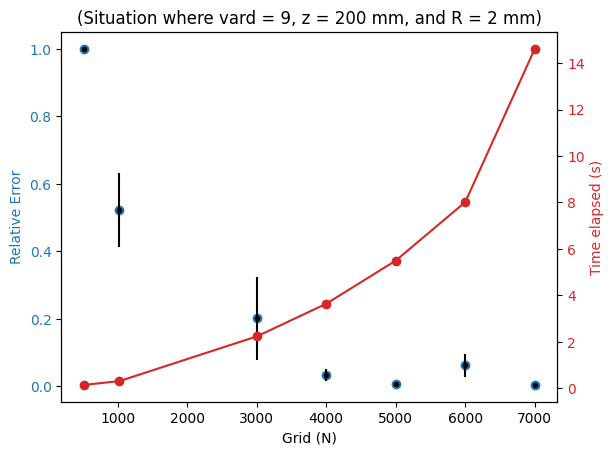

In [11]:
# Create the first plot with y1 data
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Grid (N)')
ax1.set_ylabel('Relative Error', color=color)
ax1.plot(N, mean_errors,'o', color=color)
ax1.errorbar(N,mean_errors , yerr=mean_std, fmt='.k')
ax1.tick_params(axis='y', labelcolor=color)

# Create the secondary y-axis for y2 data
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Time elapsed (s)', color=color)
ax2.plot(N, np.abs(time_N), '-o',color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title(f'(Situation where vard = {vard0}, z = {z} mm, and R = {R1} mm)')

# Show the plot
plt.show()

In [12]:
print(mean_errors)

[0.9998691907113446, 0.5231675650329332, 0.20186584936601368, 0.03286366422514469, 0.0065615645775619, 0.06284330697003865, 0.005438051368677831]


**Show all Plots**

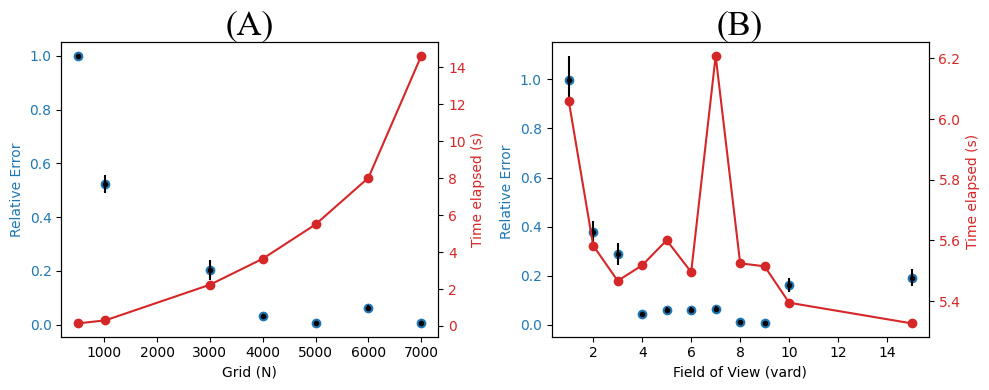

In [13]:
# Create the first plot with y1 data
fig, axs = plt.subplots(1,2,figsize=(10,4))

ax1=axs[0]
color = 'tab:blue'
ax1.set_xlabel('Grid (N)')
ax1.set_ylabel('Relative Error', color=color)
ax1.plot(N, mean_errors,'o', color=color)
ax1.errorbar(N, mean_errors,yerr=(mean_std)/np.sqrt(len(dmean_errors)), fmt='.k')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('(A)',fontname='Times New Roman',fontsize='25')

# Create the secondary y-axis for y2 data
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Time elapsed (s)', color=color)
ax2.plot(N, np.abs(time_N), '-o',color=color)
ax2.tick_params(axis='y', labelcolor=color)


ax3=axs[1]
color = 'tab:blue'
ax3.set_xlabel('Field of View (vard)')
ax3.set_ylabel('Relative Error ', color=color)
ax3.plot(vard, dmean_errors,'o', color=color)
ax3.errorbar(vard, dmean_errors,yerr= (dmean_std)/np.sqrt(len(dmean_errors)), fmt='.k')
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_title('(B)',fontname='Times New Roman',fontsize='25')

# Create the secondary y-axis for y2 data
ax4 = ax3.twinx()  
color = 'tab:red'
ax4.set_ylabel('Time elapsed (s) ', color=color)
ax4.plot( vard , np.abs(time_v), '-o',color=color)
ax4.tick_params(axis='y', labelcolor=color)


# Show the plot
plt.tight_layout()
plt.savefig('Parametros.png',dpi=300)

In [ ]:
fig,ax = plt.subplots(1,2,figsize = (10,5))

ax[1].plot([1,1.5,2,2.5,3,3.5,4,4.5,5],dmean_errors,'o')
ax[1].errorbar([1,1.5,2,2.5,3,3.5,4,4.5,5],dmean_errors,yerr = dmean_std/np.sqrt(len(dmean_errors)), fmt = '.k')
ax[1].set_xlabel('Field Vision (vard)')
ax[1].set_ylabel('Relative Error')
ax[0].set_title(f'(A)', fontname='Times New Roman', fontsize = 25)

ax[0].plot( N,mean_errors,'o')
ax[0].errorbar(N,mean_errors,yerr = mean_std/np.sqrt(len(mean_errors)), fmt = '.k')
ax[0].set_xlabel('Matrix Grid (N)')
ax[0].set_ylabel('Relative Error')
ax[1].set_title(f'(B)', fontname='Times New Roman', fontsize = 25)

plt.tight_layout()

# Now For a Sphere

In [3]:
from scipy.special import spherical_jn, spherical_yn , hankel1,lpmv

In [4]:
def MieCoefCond2(x, n, k1):
    jn = spherical_jn(n, x)
    jn1 = spherical_jn(n+1,x)
    jn_1 = spherical_jn(n-1,x)
    
    hankeln = np.sqrt(np.pi/(2*x))*hankel1(n+1/2,x)
    hankeln1 = np.sqrt(np.pi/(2*x))*hankel1(n+1+1/2,x)
    hankeln_1 = np.sqrt(np.pi/(2*x))*hankel1(n-1+1/2,x)
    
    a = -(jn + x *1/2* (  x* (jn_1-jn1) + jn ))/(hankeln + x  *1/2* ( x*(hankeln_1-hankeln1) + hankeln))

    b = - jn/hankeln  

    
    return a, b


def E1_SCATnm(n, a_n, b_n, k, x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    phi = np.sign(y) * np.arccos(x/np.sqrt(x**2+y**2))
    theta = np.arccos(z / r)

    kr = k * r
    hn = np.sqrt(np.pi / (2 * kr)) * hankel1(n + 1 / 2, kr)
    hn1 = np.sqrt(np.pi / (2 * kr)) * hankel1(n + 1 / 2 + 1, kr)
    Pn1 = lpmv(1, n + 1, np.cos(theta))
    Pn = lpmv(1, n, np.cos(theta))

    dP = (n * Pn1 - (n + 1) * np.cos(theta) * Pn) / np.sin(theta)
    P = Pn / np.sin(theta)

    # Replace zero values of dP and P at theta=0 with -1/2*n*(n+1)

    zero_theta_indices = (np.where(abs(theta) < 10**(-10))[0])
    dP[zero_theta_indices] = -0.5 * n * (n + 1)
    P[zero_theta_indices] = -0.5 * n * (n + 1)

    zero_theta_indices = (np.isnan(phi))
    phi[zero_theta_indices] = 0
    
    Gn = 1j**n
    prefac = -Gn / (n * (n + 1)) * (2 * n + 1) * 1j

    term_r = -a_n / kr * hn * Pn * n * (n + 1) * np.cos(phi)
    term_the = (-a_n / kr * ((n + 1) * hn - kr * hn1) * dP - 1j * b_n * hn * P) * np.cos(phi)
    term_phi = (a_n / kr * ((n + 1) * hn - kr * hn1) * P + 1j * b_n * hn * dP) * np.sin(phi)

    return prefac * (np.array([term_r * np.cos(phi) * np.sin(theta), term_r * np.sin(theta) * np.sin(phi), term_r * np.cos(theta)]) +
                     np.array([term_the * np.cos(phi) * np.cos(theta), term_the * np.cos(theta) * np.sin(phi), -term_the * np.sin(theta)]) +
                     np.array([-term_phi * np.sin(phi), term_phi * np.cos(phi), np.zeros_like(r)]))


In [5]:
def Optica(U0,X,Y,z,lamb):
    A = ifftshift(fft2(fftshift(U0)))
    
    Lx = np.max(X)
    Ly= np.max(Y)

    deltax = 2*Lx/len(U0)
    deltay = 2*Ly/len(U0)    

    fx = fftshift( fftfreq(len(U0),deltax) )  
    fy = fftshift( fftfreq(len(U0),deltay) )   
    
    Fx,Fy = np.meshgrid(fx,fy)
    K = 2*np.pi/lamb

    # Handle cases where u is negative
    u = K**2-(2*np.pi*Fx)**2-(2*np.pi*Fy)**2
    sqrt_u = 1j*z*np.sqrt(abs(u))
    sqrt_u[np.where(u<0)] = 1j*sqrt_u[np.where(u<0)]

    return  ifftshift( ifft2( fftshift( A*np.exp(sqrt_u) ) ) )

def mask_esp(X,Y,R,n):
  n=n+2
  U0,L =[],np.arange(1,n-1,1)*2*R/(n-1)
  for i in L:
    U0.append( (X**2+Y**2>R**2 - (i - R)**2).astype(float))

  return U0,np.ones(n-3)*L[0]

#To propagate
def Optica_G(U0,X,Y,lamb,L,z):
    
    A= 1
    for i in range(len(L)):
      A =  Optica(A*U0[i],X,Y,L[i],lamb)

    return Optica(A*U0[-1],X,Y,z,lamb)


In [6]:
R1= 1000#1*u.mm

lamb = 0.632#633*u.nm
z= 3*1e5#100*u.mm
N = 5000
vard=9

x0 = np.linspace(-vard*R1,vard*R1,N,endpoint=False)#*u.mm
X,Y = np.meshgrid(x0,x0)
time_M=[]



time_s=time.time()
n=3
A,L = mask_esp(X,Y,R1,n)
U003 = Optica_G(A,X,Y,lamb,L,z+L[0]*len(L)//2-R1)
time_M.append(time.time()-time_s)
time_s=time.time()


time_s=time.time()
n=4
A,L = mask_esp(X,Y,R1,n)
U03 = Optica_G(A,X,Y,lamb,L,z+L[0]*len(L)//2-R1)
time_M.append(time.time()-time_s)

time_s=time.time()
n=5
A,L = mask_esp(X,Y,R1,n)
U05 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M.append(time.time()-time_s)

time_s=time.time()
n=8
A,L = mask_esp(X,Y,R1,n)
U07 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M.append(time.time()-time_s)

time_s=time.time()
n=9
A,L = mask_esp(X,Y,R1,n)
U09 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M.append(time.time()-time_s)

time_s=time.time()
n=12
A,L = mask_esp(X,Y,R1,n)
U011 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M.append(time.time()-time_s)

time_s=time.time()
n=13
A,L = mask_esp(X,Y,R1,n)
U013 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M.append(time.time()-time_s)

time_s=time.time()
n=16
A,L = mask_esp(X,Y,R1,n)
U015 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M.append(time.time()-time_s)

time_s=time.time()
n=17
A,L = mask_esp(X,Y,R1,n)
U017 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M.append(time.time()-time_s)

time_s=time.time()
n=20
A,L = mask_esp(X,Y,R1,n)
U019 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M.append(time.time()-time_s)


In [7]:
# Constants
N0 = 11000
wavelength = 0.632
radius = 1000
k = 2 * np.pi / wavelength
x_value = k * radius

M = 5

y=0
x = x0[np.where(abs(x0)<=150)[0]]

#z = 3*1e5

E01_sca = 0

for i in range(1,N0):
    a_n,b_n = MieCoefCond2(x_value, i, k)
    #a_n,b_n = MieCoef(x_value,M, i)
    
    # Calculate the scattered electric field for both m=1 and m=-1
    E01_sca += E1_SCATnm(i, a_n, b_n, k, x, y, z) 

C:\Users\user\AppData\Local\Temp\ipykernel_25704\1069080426.py:20: RuntimeWarning: invalid value encountered in divide
  phi = np.sign(y) * np.arccos(x/np.sqrt(x**2+y**2))
C:\Users\user\AppData\Local\Temp\ipykernel_25704\1069080426.py:29: RuntimeWarning: invalid value encountered in divide
  dP = (n * Pn1 - (n + 1) * np.cos(theta) * Pn) / np.sin(theta)
C:\Users\user\AppData\Local\Temp\ipykernel_25704\1069080426.py:30: RuntimeWarning: invalid value encountered in divide
  P = Pn / np.sin(theta)


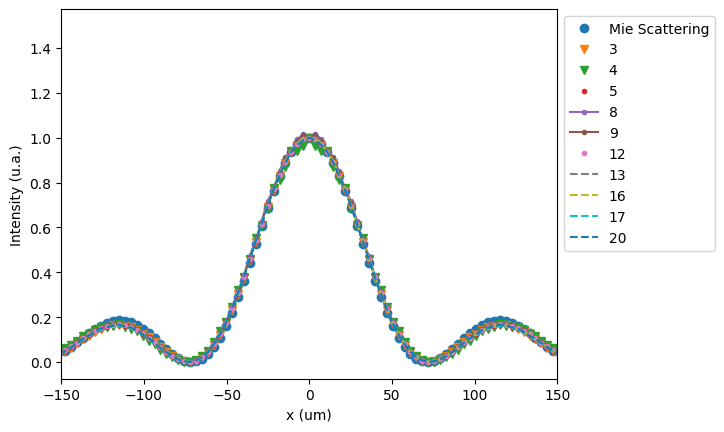

In [8]:
E_inc= np.array([ np.ones(len(x))*np.exp(1j*k*z) ,0*np.ones(len(x)),0*np.ones(len(x))    ])
E = E_inc+E01_sca
U = abs(E[0])**2 + abs(E[1])**2 + abs(E[2])**2

plt.plot(x,U/max(U),'o',label='Mie Scattering')

plt.plot(x0,abs(U003[N//2])**2/abs(U003[N//2][N//2])**2 , 'v',label='3')
plt.plot(x0,abs(U03[N//2])**2/abs(U03[N//2][N//2])**2 , 'v',label='4')
plt.plot(x0,abs(U05[N//2])**2/abs(U05[N//2][N//2])**2  , '.',label='5')
plt.plot(x0,abs(U07[N//2])**2/abs(U07[N//2][N//2])**2  , '.-',label='8')
plt.plot(x0,abs(U09[N//2])**2/abs(U09[N//2][N//2])**2 , '.-',label='9')
plt.plot(x0,abs(U011[N//2])**2/abs(U011[N//2][N//2])**2  , '.',label='12')
plt.plot(x0,abs(U013[N//2])**2/abs(U013[N//2][N//2])**2  , '--',label='13')
plt.plot(x0,abs(U015[N//2])**2/abs(U015[N//2][N//2])**2  , '--',label='16')
plt.plot(x0,abs(U017[N//2])**2/abs(U017[N//2][N//2])**2 , '--',label='17')
plt.plot(x0,abs(U019[N//2])**2/abs(U019[N//2][N//2])**2 , '--',label='20')

plt.xlim(-150,150)
#plt.yscale('log')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel('Intensity (u.a.)')
plt.xlabel('x (um)')
plt.show()

In [9]:

# Function to compute the mean error
def compute_mean_error(x, U,J):
    filtered_indices = np.where(abs(x) <= 150)[0]  # Filter indices where x < 0.1
    filtered_U = (J-U[filtered_indices])/J  # Filter corresponding values of U
    return np.mean(abs(filtered_U)),np.std(abs(filtered_U))/np.sqrt(len(filtered_U))  # Compute mean error

# Initialize empty list to store mean errors
mean_errors = []
mean_std=[]
# Loop over different values of N and compute mean error
for u in range(10):
    if u == 1:
        err,std = compute_mean_error(x0, abs(U03[N // 2 ])**2,U)
    elif u == 2:
        err,std = compute_mean_error(x0, abs(U05[N // 2 ])**2,U)
    elif u == 3:
        err,std = compute_mean_error(x0, abs(U07[N // 2 ])**2 ,U)
    elif u == 4:
        err,std = compute_mean_error(x0, abs(U09[N // 2 ])**2,U)
    elif u == 5:
        err,std = compute_mean_error(x0, abs(U011[N // 2 ])**2,U)
    elif u == 6:
        err,std = compute_mean_error(x0, abs(U013[N // 2 ])**2,U)
    elif u == 7:
        err,std = compute_mean_error(x0, abs(U015[N // 2 ])**2,U)
    elif u == 8:
        err,std = compute_mean_error(x0, abs(U017[N // 2 ])**2,U)
    elif u == 9:
        err,std = compute_mean_error(x0, abs(U019[N // 2 ])**2,U)
    elif u == 0:
        err,std = compute_mean_error(x0, abs(U003[N // 2 ])**2,U)
    mean_errors.append(err)
    mean_std.append(std)

print(mean_errors)

[0.15685976432828297, 0.2769916959258112, 0.15005824786196134, 0.195094505031929, 0.14238425444710834, 0.169889475404757, 0.16581691916368343, 0.19073054085989438, 0.19451902583079828, 0.18677654921743403]


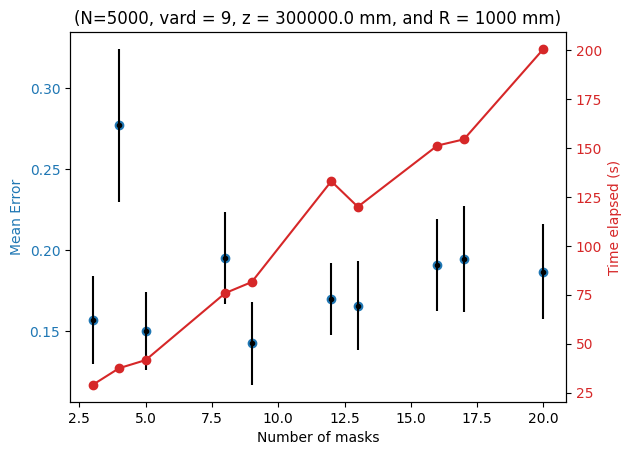

In [10]:
vard=9
# Create the first plot with y1 data
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Number of masks')
ax1.set_ylabel('Mean Error', color=color)
ax1.plot([3,4,5,8,9,12,13,16,17,20], mean_errors,'o', color=color)
ax1.errorbar([3,4,5,8,9,12,13,16,17,20], mean_errors,yerr=mean_std, fmt='.k')
#ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)

# Create the secondary y-axis for y2 data
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Time elapsed (s)', color=color)
ax2.plot([3,4,5,8,9,12,13,16,17,20], np.abs(time_M), '-o',color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title(f'(N={N}, vard = {vard}, z = {z} mm, and R = {R1} mm)')

# Show the plot
plt.show()


Using Other N

In [11]:
R1= 1000#1*u.mm

lamb = 0.632#633*u.nm
#z= 3*1e5#100*u.mm
N = 4000

x0 = np.linspace(-9*R1,9*R1,N, endpoint=False)#*u.mm
X,Y = np.meshgrid(x0,x0)
time_M2=[]

time_s=time.time()
n=3
A,L = mask_esp(X,Y,R1,n)
U003 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M2.append(time.time()-time_s)

time_s=time.time()
n=4
A,L = mask_esp(X,Y,R1,n)
U03 = Optica_G(A,X,Y,lamb,L,z+L[0]*len(L)//2-R1)
time_M2.append(time.time()-time_s)

time_s=time.time()
n=5
A,L = mask_esp(X,Y,R1,n)
U05 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M2.append(time.time()-time_s)

time_s=time.time()
n=8
A,L = mask_esp(X,Y,R1,n)
U07 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M2.append(time.time()-time_s)

time_s=time.time()
n=9
A,L = mask_esp(X,Y,R1,n)
U09 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M2.append(time.time()-time_s)

time_s=time.time()
n=12
A,L = mask_esp(X,Y,R1,n)
U011 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M2.append(time.time()-time_s)

time_s=time.time()
n=13
A,L = mask_esp(X,Y,R1,n)
U013 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M2.append(time.time()-time_s)

time_s=time.time()
n=16
A,L = mask_esp(X,Y,R1,n)
U015 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M2.append(time.time()-time_s)

time_s=time.time()
n=17
A,L = mask_esp(X,Y,R1,n)
U017 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M2.append(time.time()-time_s)

time_s=time.time()
n=20
A,L = mask_esp(X,Y,R1,n)
U019 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M2.append(time.time()-time_s)


In [12]:
# Constants
N0 = 11000
wavelength = 0.632
radius = 1000
k = 2 * np.pi / wavelength
x_value = k * radius

M = 5

y=0
x = x0[np.where(abs(x0)<=150)[0]]

#z = 3*1e5

E01_sca = 0

for i in range(1,N0):
    a_n,b_n = MieCoefCond2(x_value, i, k)
    #a_n,b_n = MieCoef(x_value,M, i)
    
    # Calculate the scattered electric field for both m=1 and m=-1
    E01_sca += E1_SCATnm(i, a_n, b_n, k, x, y, z) 

C:\Users\user\AppData\Local\Temp\ipykernel_25704\1069080426.py:20: RuntimeWarning: invalid value encountered in divide
  phi = np.sign(y) * np.arccos(x/np.sqrt(x**2+y**2))
C:\Users\user\AppData\Local\Temp\ipykernel_25704\1069080426.py:29: RuntimeWarning: invalid value encountered in divide
  dP = (n * Pn1 - (n + 1) * np.cos(theta) * Pn) / np.sin(theta)
C:\Users\user\AppData\Local\Temp\ipykernel_25704\1069080426.py:30: RuntimeWarning: invalid value encountered in divide
  P = Pn / np.sin(theta)


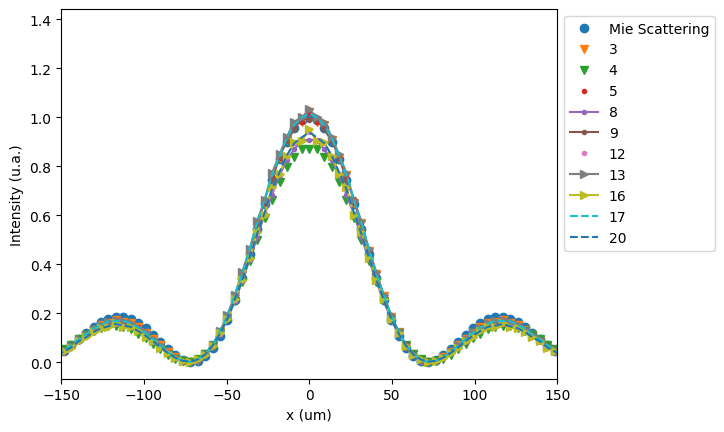

In [13]:
E_inc= np.array([ np.ones(len(x))*np.exp(1j*k*z) ,0*np.ones(len(x)),0*np.ones(len(x))    ])
E = E_inc+E01_sca
U = abs(E[0])**2 + abs(E[1])**2 + abs(E[2])**2

plt.plot(x,U/max(U),'o',label='Mie Scattering')


plt.plot(x0,abs(U003[N//2])**2 , 'v',label='3')
plt.plot(x0,abs(U03[N//2])**2 , 'v',label='4')
plt.plot(x0,abs(U05[N//2])**2 , '.',label='5')
plt.plot(x0,abs(U07[N//2])**2 , '.-',label='8')
plt.plot(x0,abs(U09[N//2])**2, '.-',label='9')
plt.plot(x0,abs(U011[N//2])**2 , '.',label='12')
plt.plot(x0,abs(U013[N//2])**2 , '->',label='13')
plt.plot(x0,abs(U015[N//2])**2 , '->',label='16')
plt.plot(x0,abs(U017[N//2])**2, '--',label='17')
plt.plot(x0,abs(U019[N//2])**2, '--',label='20')

plt.xlim(-150,150)
#plt.yscale('log')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel('Intensity (u.a.)')
plt.xlabel('x (um)')
plt.show()

In [14]:

# Function to compute the mean error
def compute_mean_error(x, U,J):
    filtered_indices = np.where(abs(x) <= 150)[0]  # Filter indices where x < 0.1
    filtered_U = (J-U[filtered_indices])/J # Filter corresponding values of U
    return np.mean(abs(filtered_U)),np.std(abs(filtered_U))/np.sqrt(len(filtered_U))  # Compute mean error

# Initialize empty list to store mean errors
mean_errors2 = []
mean_std2=[]
# Loop over different values of N and compute mean error
for u in range(10):
    if u == 1:
        err,std = compute_mean_error(x0, abs(U03[N // 2 ])**2,U)
    elif u == 2:
        err,std = compute_mean_error(x0, abs(U05[N // 2 ])**2,U)
    elif u == 3:
        err,std = compute_mean_error(x0, abs(U07[N // 2 ])**2 ,U)
    elif u == 4:
        err,std = compute_mean_error(x0, abs(U09[N // 2 ])**2,U)
    elif u == 5:
        err,std = compute_mean_error(x0, abs(U011[N // 2 ])**2,U)
    elif u == 6:
        err,std = compute_mean_error(x0, abs(U013[N // 2 ])**2,U)
    elif u == 7:
        err,std = compute_mean_error(x0, abs(U015[N // 2 ])**2,U)
    elif u == 8:
        err,std = compute_mean_error(x0, abs(U017[N // 2 ])**2,U)
    elif u == 9:
        err,std = compute_mean_error(x0, abs(U019[N // 2 ])**2,U)
    elif u == 0:
        err,std = compute_mean_error(x0, abs(U003[N // 2 ])**2,U)
    mean_errors2.append(err)
    mean_std2.append(std)

print(mean_errors2)

[0.1381546744640644, 0.257109140567763, 0.14807575289161404, 0.18723251209380043, 0.17014953132380556, 0.1876014544934027, 0.15084319921022557, 0.20908618982386756, 0.148041818847494, 0.19994285794497568]


Another

In [15]:
R1= 1000#1*u.mm

lamb = 0.632#633*u.nm
#z= 3*1e5#100*u.mm
N = 3000

x0 = np.linspace(-9*R1,9*R1,N,endpoint=False)#*u.mm
X,Y = np.meshgrid(x0,x0)
time_M3=[]

time_s=time.time()
n=3
A,L = mask_esp(X,Y,R1,n)
U003 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M3.append(time.time()-time_s)

time_s=time.time()
n=4
A,L = mask_esp(X,Y,R1,n)
U03 = Optica_G(A,X,Y,lamb,L,z+L[0]*len(L)//2-R1)
time_M3.append(time.time()-time_s)

time_s=time.time()
n=5
A,L = mask_esp(X,Y,R1,n)
U05 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M3.append(time.time()-time_s)

time_s=time.time()
n=8
A,L = mask_esp(X,Y,R1,n)
U07 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M3.append(time.time()-time_s)

time_s=time.time()
n=9
A,L = mask_esp(X,Y,R1,n)
U09 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M3.append(time.time()-time_s)

time_s=time.time()
n=12
A,L = mask_esp(X,Y,R1,n)
U011 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M3.append(time.time()-time_s)

time_s=time.time()
n=13
A,L = mask_esp(X,Y,R1,n)
U013 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M3.append(time.time()-time_s)

time_s=time.time()
n=16
A,L = mask_esp(X,Y,R1,n)
U015 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M3.append(time.time()-time_s)

time_s=time.time()
n=17
A,L = mask_esp(X,Y,R1,n)
U017 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M3.append(time.time()-time_s)

time_s=time.time()
n=20
A,L = mask_esp(X,Y,R1,n)
U019 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M3.append(time.time()-time_s)


In [16]:
# Constants
N0 = 11000
wavelength = 0.632
radius = 1000
k = 2 * np.pi / wavelength
x_value = k * radius

M = 5

y=0
x = x0[np.where(abs(x0)<=150)[0]]

#z = 3*1e5

E01_sca = 0

for i in range(1,N0):
    a_n,b_n = MieCoefCond2(x_value, i, k)
    #a_n,b_n = MieCoef(x_value,M, i)
    
    # Calculate the scattered electric field for both m=1 and m=-1
    E01_sca += E1_SCATnm(i, a_n, b_n, k, x, y, z) 

C:\Users\user\AppData\Local\Temp\ipykernel_25704\1069080426.py:20: RuntimeWarning: invalid value encountered in divide
  phi = np.sign(y) * np.arccos(x/np.sqrt(x**2+y**2))
C:\Users\user\AppData\Local\Temp\ipykernel_25704\1069080426.py:29: RuntimeWarning: invalid value encountered in divide
  dP = (n * Pn1 - (n + 1) * np.cos(theta) * Pn) / np.sin(theta)
C:\Users\user\AppData\Local\Temp\ipykernel_25704\1069080426.py:30: RuntimeWarning: invalid value encountered in divide
  P = Pn / np.sin(theta)


In [17]:

E_inc= np.array([ np.ones(len(x))*np.exp(1j*k*z) ,0*np.ones(len(x)),0*np.ones(len(x))    ])
E = E_inc+E01_sca
U = abs(E[0])**2 + abs(E[1])**2 + abs(E[2])**2


# Function to compute the mean error
def compute_mean_error(x, U,J):
    filtered_indices = np.where(abs(x) <= 150)[0]  # Filter indices where x < 0.1
    filtered_U = (J -U[filtered_indices])/J # Filter corresponding values of U
    return np.mean(abs(filtered_U)),np.std(abs(filtered_U))/np.sqrt(len(filtered_U))  # Compute mean error

# Initialize empty list to store mean errors
mean_errors3 = []
mean_std3=[]
# Loop over different values of N and compute mean error
for u in range(10):
    if u == 1:
        err,std = compute_mean_error(x0, abs(U03[N // 2 ])**2,U)
    elif u == 2:
        err,std = compute_mean_error(x0, abs(U05[N // 2 ])**2,U)
    elif u == 3:
        err,std = compute_mean_error(x0, abs(U07[N // 2 ])**2 ,U)
    elif u == 4:
        err,std = compute_mean_error(x0, abs(U09[N // 2 ])**2,U)
    elif u == 5:
        err,std = compute_mean_error(x0, abs(U011[N // 2 ])**2,U)
    elif u == 6:
        err,std = compute_mean_error(x0, abs(U013[N // 2 ])**2,U)
    elif u == 7:
        err,std = compute_mean_error(x0, abs(U015[N // 2 ])**2,U)
    elif u == 8:
        err,std = compute_mean_error(x0, abs(U017[N // 2 ])**2,U)
    elif u == 9:
        err,std = compute_mean_error(x0, abs(U019[N // 2 ])**2,U)
    elif u == 0:
        err,std = compute_mean_error(x0, abs(U003[N // 2 ])**2,U)
    mean_errors3.append(err)
    mean_std3.append(std)

print(mean_errors3)

[0.1423159589187401, 0.2739714757772101, 0.14426861176096753, 0.19533850452717366, 0.14617357324684674, 0.18715553562725487, 0.14897672523414812, 0.18254611817543998, 0.15791959577853576, 0.1764306452674432]


In [18]:
R1= 1000#1*u.mm

lamb = 0.632#633*u.nm
z= 3*1e5#100*u.mm
N = 2000

x0 = np.linspace(-9*R1,9*R1,N,endpoint=False)#*u.mm
X,Y = np.meshgrid(x0,x0)
time_M4=[]

time_s=time.time()
n=3
A,L = mask_esp(X,Y,R1,n)
U003 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M4.append(time.time()-time_s)

time_s=time.time()
n=4
A,L = mask_esp(X,Y,R1,n)
U03 = Optica_G(A,X,Y,lamb,L,z+L[0]*len(L)//2-R1)
time_M4.append(time.time()-time_s)

time_s=time.time()
n=5
A,L = mask_esp(X,Y,R1,n)
U05 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M4.append(time.time()-time_s)

time_s=time.time()
n=8
A,L = mask_esp(X,Y,R1,n)
U07 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M4.append(time.time()-time_s)

time_s=time.time()
n=9
A,L = mask_esp(X,Y,R1,n)
U09 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M4.append(time.time()-time_s)

time_s=time.time()
n=12
A,L = mask_esp(X,Y,R1,n)
U011 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M4.append(time.time()-time_s)

time_s=time.time()
n=13
A,L = mask_esp(X,Y,R1,n)
U013 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M4.append(time.time()-time_s)

time_s=time.time()
n=16
A,L = mask_esp(X,Y,R1,n)
U015 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M4.append(time.time()-time_s)

time_s=time.time()
n=17
A,L = mask_esp(X,Y,R1,n)
U017 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M4.append(time.time()-time_s)

time_s=time.time()
n=20
A,L = mask_esp(X,Y,R1,n)
U019 = Optica_G(A,X,Y,lamb,L,z-R1+L[0]*len(L)//2)
time_M4.append(time.time()-time_s)


In [19]:
# Constants
N0 = 11000
wavelength = 0.632
radius = 1000
k = 2 * np.pi / wavelength
x_value = k * radius

M = 5

y=0
x = x0[np.where(abs(x0)<=150)[0]]

#z = 3*1e5

E01_sca = 0

for i in range(1,N0):
    a_n,b_n = MieCoefCond2(x_value, i, k)
    #a_n,b_n = MieCoef(x_value,M, i)
    
    # Calculate the scattered electric field for both m=1 and m=-1
    E01_sca += E1_SCATnm(i, a_n, b_n, k, x, y, z) 

C:\Users\user\AppData\Local\Temp\ipykernel_25704\1069080426.py:20: RuntimeWarning: invalid value encountered in divide
  phi = np.sign(y) * np.arccos(x/np.sqrt(x**2+y**2))
C:\Users\user\AppData\Local\Temp\ipykernel_25704\1069080426.py:29: RuntimeWarning: invalid value encountered in divide
  dP = (n * Pn1 - (n + 1) * np.cos(theta) * Pn) / np.sin(theta)
C:\Users\user\AppData\Local\Temp\ipykernel_25704\1069080426.py:30: RuntimeWarning: invalid value encountered in divide
  P = Pn / np.sin(theta)


In [20]:

E_inc= np.array([ np.ones(len(x))*np.exp(1j*k*z) ,0*np.ones(len(x)),0*np.ones(len(x))    ])
E = E_inc+E01_sca
U = abs(E[0])**2 + abs(E[1])**2 + abs(E[2])**2


# Function to compute the mean error
def compute_mean_error(x, U,J):
    filtered_indices = np.where(abs(x) <= 150)[0]  # Filter indices where x < 0.1
    filtered_U = (J-U[filtered_indices])/J  # Filter corresponding values of U
    return np.mean(abs(filtered_U)),np.std(abs(filtered_U))/np.sqrt(len(filtered_U))  # Compute mean error

# Initialize empty list to store mean errors
mean_errors4 = []
mean_std4=[]
# Loop over different values of N and compute mean error
for u in range(10):
    if u == 1:
        err,std = compute_mean_error(x0, abs(U03[N // 2 ])**2,U)
    elif u == 2:
        err,std = compute_mean_error(x0, abs(U05[N // 2 ])**2,U)
    elif u == 3:
        err,std = compute_mean_error(x0, abs(U07[N // 2 ])**2 ,U)
    elif u == 4:
        err,std = compute_mean_error(x0, abs(U09[N // 2 ])**2,U)
    elif u == 5:
        err,std = compute_mean_error(x0, abs(U011[N // 2 ])**2,U)
    elif u == 6:
        err,std = compute_mean_error(x0, abs(U013[N // 2 ])**2,U)
    elif u == 7:
        err,std = compute_mean_error(x0, abs(U015[N // 2 ])**2,U)
    elif u == 8:
        err,std = compute_mean_error(x0, abs(U017[N // 2 ])**2,U)
    elif u == 9:
        err,std = compute_mean_error(x0, abs(U019[N // 2 ])**2,U)
    elif u == 0:
        err,std = compute_mean_error(x0, abs(U003[N // 2 ])**2,U)
    mean_errors4.append(err)
    mean_std4.append(std)

print(mean_errors4)

[0.14362320187164793, 0.3033671913361738, 0.1487146185186179, 0.22385941091563794, 0.151917733406026, 0.20195400892225776, 0.1593749753742998, 0.18981848098746942, 0.1478907433956391, 0.18626545587367008]


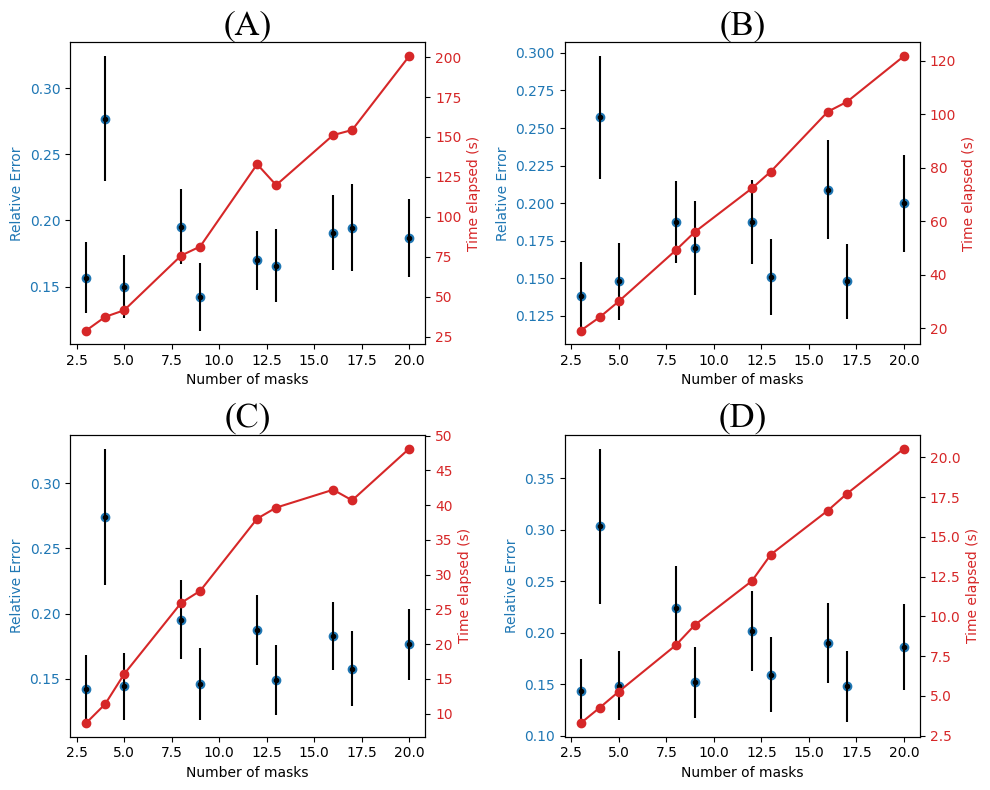

In [21]:
# Create the first plot with y1 data
fig, [[ax1,ax3],[ax5,ax7]] = plt.subplots(2,2, figsize=(10,8))

color = 'tab:blue'
ax1.set_xlabel('Number of masks')
ax1.set_ylabel('Relative Error', color=color)
ax1.plot([3,4,5,8,9,12,13,16,17,20], mean_errors,'o', color=color)
ax1.errorbar([3,4,5,8,9,12,13,16,17,20], mean_errors,yerr=mean_std, fmt='.k')
ax1.tick_params(axis='y', labelcolor=color)

# Create the secondary y-axis for y2 data
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Time elapsed (s)', color=color)
ax2.plot([3,4,5,8,9,12,13,16,17,20], np.abs(time_M), '-o',color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
#ax1.set_title(f'(N=5001, vard = {vard}, z = {z} mm, and R = {R1} mm)')
ax1.set_title(f'(A)',fontname='TImes New Roman',fontsize=25)


color = 'tab:blue'
ax3.set_xlabel('Number of masks')
ax3.set_ylabel('Relative Error', color=color)
ax3.plot([3,4,5,8,9,12,13,16,17,20], mean_errors2,'o', color=color)
ax3.errorbar([3,4,5,8,9,12,13,16,17,20], mean_errors2,yerr=mean_std2, fmt='.k')
ax3.tick_params(axis='y', labelcolor=color)

# Create the secondary y-axis for y2 data
ax4 = ax3.twinx()  
color = 'tab:red'
ax4.set_ylabel('Time elapsed (s)', color=color)
ax4.plot([3,4,5,8,9,12,13,16,17,20], np.abs(time_M2), '-o',color=color)
ax4.tick_params(axis='y', labelcolor=color)

# Add a title
#ax3.set_title(f'(N=4001, vard = {vard}, z = {z} mm, and R = {R1} mm)')
ax3.set_title(f'(B)',fontname='TImes New Roman',fontsize=25)
# Show the plot


color = 'tab:blue'
ax5.set_xlabel('Number of masks')
ax5.set_ylabel('Relative Error', color=color)
ax5.plot([3,4,5,8,9,12,13,16,17,20], mean_errors3,'o', color=color)
ax5.errorbar([3,4,5,8,9,12,13,16,17,20], mean_errors3,yerr=mean_std3, fmt='.k')
ax5.tick_params(axis='y', labelcolor=color)

# Create the secondary y-axis for y2 data
ax6 = ax5.twinx()  
color = 'tab:red'
ax6.set_ylabel('Time elapsed (s)', color=color)
ax6.plot([3,4,5,8,9,12,13,16,17,20], np.abs(time_M3), '-o',color=color)
ax6.tick_params(axis='y', labelcolor=color)

# Add a title
#ax6.set_title(f'(N=3001, vard = {vard}, z = {z} mm, and R = {R1} mm)')
ax6.set_title(f'(C)',fontname='TImes New Roman',fontsize=25)
# Show the plot

color = 'tab:blue'
ax7.set_xlabel('Number of masks')
ax7.set_ylabel('Relative Error', color=color)
ax7.plot([3,4,5,8,9,12,13,16,17,20], mean_errors4,'o', color=color)
ax7.errorbar([3,4,5,8,9,12,13,16,17,20], mean_errors4,yerr=mean_std4, fmt='.k')
ax7.tick_params(axis='y', labelcolor=color)

# Create the secondary y-axis for y2 data
ax8 = ax7.twinx()  
color = 'tab:red'
ax8.set_ylabel('Time elapsed (s)', color=color)
ax8.plot([3,4,5,8,9,12,13,16,17,20], np.abs(time_M4), '-o',color=color)
ax8.tick_params(axis='y', labelcolor=color)

# Add a title
#ax7.set_title(f'(N=3001, vard = {vard}, z = {z} mm, and R = {R1} mm)')
ax7.set_title(f'(D)',fontname='TImes New Roman',fontsize=25)
# Show the plot

plt.tight_layout()
#plt.savefig('Esf-params2.png',dpi=300)

**Now using multiples masks**

In [14]:
R1= 100#1*u.mm

lamb = 0.632#633*u.nm
z= 10*1e4#100*u.mm
N0 = 3998
time_M5=[]


x00 = np.linspace(-9*R1,9*R1,N0, endpoint=False)#*u.mm
X,Y = np.meshgrid(x00,x00)

tim_s = time.time()
n = 1
A = (X**2+Y**2>R1**2).astype(float)
U01 = Optica(A,X,Y,z,lamb)
time_M5.append(time.time()-tim_s)

tim_s = time.time()
n = 11
A,L = mask_esp(X,Y,R1,n)
U011 = Optica_G(A,X,Y,lamb,L,z+L[0]-R1)
time_M5.append(time.time()-tim_s)

tim_s = time.time()
n = 21
A,L = mask_esp(X,Y,R1,n)
U021 = Optica_G(A,X,Y,lamb,L,z+L[0]-R1)
time_M5.append(time.time()-tim_s)
tim_s = time.time()

n = 31
A,L = mask_esp(X,Y,R1,n)
U031 = Optica_G(A,X,Y,lamb,L,z+L[0]-R1)
time_M5.append(time.time()-tim_s)

tim_s = time.time()
n= 41
A,L = mask_esp(X,Y,R1,n)
U041 = Optica_G(A,X,Y,lamb,L,z+L[0]-R1)
time_M5.append(time.time()-tim_s)

tim_s = time.time()
n=51
A,L = mask_esp(X,Y,R1,n)
U051= Optica_G(A,X,Y,lamb,L,z+L[0]-R1)
time_M5.append(time.time()-tim_s)

tim_s = time.time()
n=61
A,L = mask_esp(X,Y,R1,n)
U061 = Optica_G(A,X,Y,lamb,L,z+L[0]-R1)
time_M5.append(time.time()-tim_s)



tim_s = time.time()
n=81
A,L = mask_esp(X,Y,R1,n)
U081 = Optica_G(A,X,Y,lamb,L,z+L[0]-R1)
time_M5.append(time.time()-tim_s)


In [15]:
# Constants
N00 = 11000
wavelength = 0.632
radius = 100
k = 2 * np.pi / wavelength
x_value = k * radius

M = 5

y=0
x = x00[np.where(abs(x00)<100)[0]]


E01_sca = 0

for i in range(1,N00):
    a_n,b_n = MieCoefCond2(x_value, i, k)
    #a_n,b_n = MieCoef(x_value,M, i)
    if np.isnan(np.abs(a_n)) or np.isnan( np.abs(b_n)):
        print(i)
        break
    
    # Calculate the scattered electric field for both m=1 and m=-1
    E01_sca += E1_SCATnm(i, a_n, b_n, k, x, y, z) 

C:\Users\user\AppData\Local\Temp\ipykernel_8216\1069080426.py:20: RuntimeWarning: invalid value encountered in divide
  phi = np.sign(y) * np.arccos(x/np.sqrt(x**2+y**2))
C:\Users\user\AppData\Local\Temp\ipykernel_8216\1069080426.py:29: RuntimeWarning: invalid value encountered in divide
  dP = (n * Pn1 - (n + 1) * np.cos(theta) * Pn) / np.sin(theta)
C:\Users\user\AppData\Local\Temp\ipykernel_8216\1069080426.py:30: RuntimeWarning: invalid value encountered in divide
  P = Pn / np.sin(theta)


1833


C:\Users\user\AppData\Local\Temp\ipykernel_8216\1069080426.py:10: RuntimeWarning: invalid value encountered in scalar divide
  a = -(jn + x *1/2* (  x* (jn_1-jn1) + jn ))/(hankeln + x  *1/2* ( x*(hankeln_1-hankeln1) + hankeln))


In [16]:
E_inc= np.array([ np.ones(len(x))*np.exp(1j*k*z) ,0*np.ones(len(x)),0*np.ones(len(x))    ])
E = E_inc+E01_sca
U = abs(E[0])**2 + abs(E[1])**2 + abs(E[2])**2


# Function to compute the mean error
def compute_mean_error(x, U,J):
    filtered_indices = np.where(abs(x) < 100)[0]  # Filter indices where x < 0.1
    filtered_U = (J-U[filtered_indices])/J  # Filter corresponding values of U
    return np.mean(abs(filtered_U)),np.std(abs(filtered_U))/np.sqrt(len(filtered_U))  # Compute mean error

# Initialize empty list to store mean errors
mean_errors5 = []
mean_std5=[]
# Loop over different values of N and compute mean error
for u in range(8):
    if u == 0:
        err,std = compute_mean_error(x00, abs(U01[N0 // 2 ])**2,U)
    elif u == 1:
        err,std = compute_mean_error(x00, abs(U011[N0 // 2 ])**2,U)
    elif u == 2:
        err,std = compute_mean_error(x00, abs(U021[N0 // 2 ])**2 ,U)
    elif u == 3:
        err,std = compute_mean_error(x00, abs(U031[N0 // 2 ])**2,U)
    elif u == 4:
        err,std = compute_mean_error(x00, abs(U041[N0 // 2 ])**2,U)
    elif u == 5:
        err,std = compute_mean_error(x00, abs(U051[N0 // 2 ])**2,U)
    elif u == 6:
        err,std = compute_mean_error(x00, abs(U061[N0 // 2 ])**2,U)
    elif u == 7:
        err,std = compute_mean_error(x00, abs(U081[N0// 2 ])**2,U)
    #elif u == 8:
        #err,std = compute_mean_error(x00, abs(U091[N0 // 2 ])**2,U)
    mean_errors5.append(err)
    mean_std5.append(std)

print(mean_errors5)

[0.03652002599442342, 0.04811824424271613, 0.053893242134779695, 0.05462345894133034, 0.05923935398649175, 0.06073421131830332, 0.06099365408955234, 0.061368333421466456]


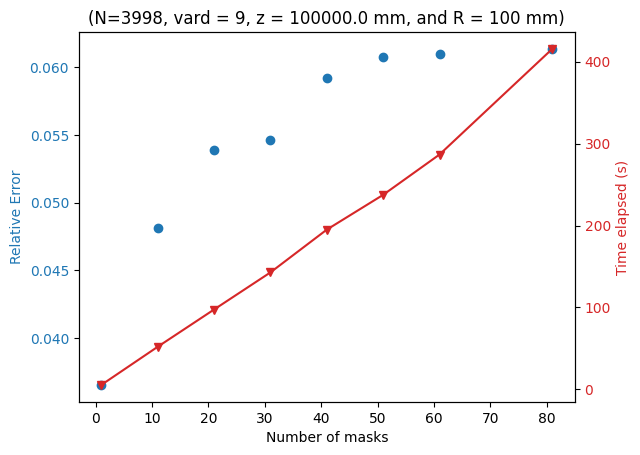

In [17]:
vard=9
# Create the first plot with y1 data
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Number of masks')
ax1.set_ylabel('Relative Error', color=color)
ax1.plot([1,11,21,31,41,51,61,81], mean_errors5,'o', color=color)
#ax1.errorbar([11,31,41,51,61], mean_errors5,yerr=mean_std5, fmt='.k')
#ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)

# Create the secondary y-axis for y2 data
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Time elapsed (s)', color=color)
ax2.plot([1,11,21,31,41,51,61,81], np.abs(time_M5), '-v',color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title(f'(N={N0}, vard = {vard}, z = {z} mm, and R = {R1} mm)')

# Show the plot
plt.show()


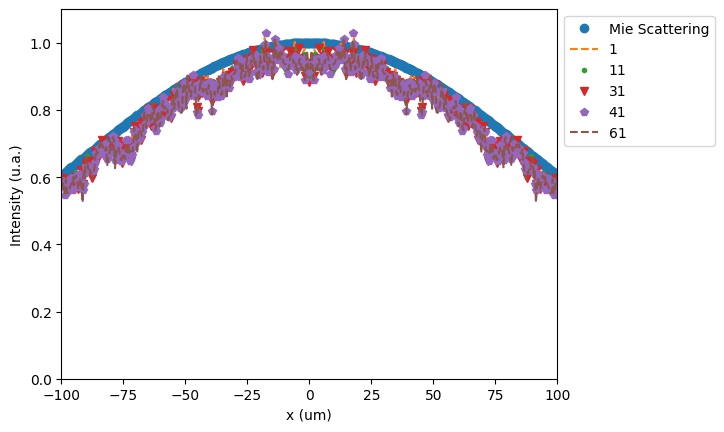

In [18]:
plt.plot(x,U/max(U),'o',label='Mie Scattering')


plt.plot(x00,abs(U01[N0//2])**2, '--',label='1')
plt.plot(x00,abs(U011[N0//2])**2, '.',label='11')
plt.plot(x00,abs(U031[N0//2])**2, 'v',label='31')
plt.plot(x00,abs(U041[N0//2])**2, 'p',label='41')

plt.plot(x00,abs(U061[N0//2])**2 , '--',label='61')

#plt.plot(x00,abs(U061[N0//2])**2 / (abs(U091[N0//2][N0//2])**2 ), '-.',label='91')
plt.xlim(-100,100)
#plt.yscale('log')
plt.ylim(0,1.1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel('Intensity (u.a.)')
plt.xlabel('x (um)')
plt.show()


In [19]:

E_inc= np.array([ np.ones(len(x))*np.exp(1j*k*z) ,0*np.ones(len(x)),0*np.ones(len(x))    ])
E = E_inc+E01_sca
U = abs(E[0])**2 + abs(E[1])**2 + abs(E[2])**2


# Function to compute the mean error
def compute_mean_error(x, U,J):
    filtered_indices = np.where(abs(x) < 100)[0]  # Filter indices where x < 0.1
    filtered_U = (J/J[len(J)//2]-U[filtered_indices]/U[len(U)//2])/(J/J[len(J)//2] )  # Filter corresponding values of U
    return np.mean(abs(filtered_U)),np.std(abs(filtered_U))/np.sqrt(len(filtered_U))  # Compute mean error

# Initialize empty list to store mean errors
mean_errors6 = []
mean_std6=[]
# Loop over different values of N and compute mean error
for u in range(8):
    if u == 0:
        err,std = compute_mean_error(x00, abs(U01[N0 // 2 ])**2,U)
    elif u == 1:
        err,std = compute_mean_error(x00, abs(U011[N0 // 2 ])**2,U)
    elif u == 2:
        err,std = compute_mean_error(x00, abs(U021[N0 // 2 ])**2 ,U)
    elif u == 3:
        err,std = compute_mean_error(x00, abs(U031[N0 // 2 ])**2,U)
    elif u == 4:
        err,std = compute_mean_error(x00, abs(U041[N0 // 2 ])**2,U)
    elif u == 5:
        err,std = compute_mean_error(x00, abs(U051[N0// 2 ])**2,U)
    elif u == 6:
        err,std = compute_mean_error(x00, abs(U061[N0 // 2 ])**2,U)
    elif u == 7:
        err,std = compute_mean_error(x00, abs(U081[N0 // 2 ])**2,U)
    #elif u == 8:
        #err,std = compute_mean_error(x00, abs(U091[N0 // 2 ])**2,U)
    mean_errors6.append(err)
    mean_std6.append(std)

print(mean_errors6)

[0.042359333840419414, 0.03741252119099761, 0.0487818720168932, 0.06951782535406625, 0.03882634301218591, 0.03114475615044987, 0.0321104290077477, 0.058559057228791116]


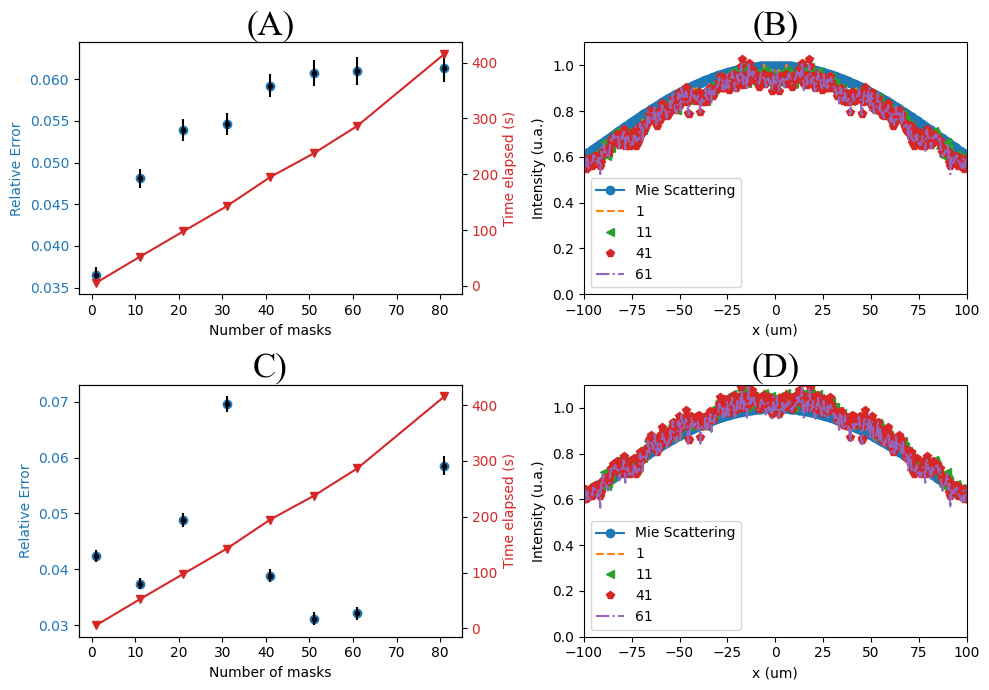

In [20]:
vard=9
# Create the first plot with y1 data
fig, [[ax1,ax3],[ax4,ax6]] = plt.subplots(2,2,figsize=(10,7))

color = 'tab:blue'
ax1.set_xlabel('Number of masks')
ax1.set_ylabel('Relative Error', color=color)
ax1.plot([1,11,21,31,41,51,61,81], mean_errors5,'o', color=color)
ax1.errorbar([1,11,21,31,41,51,61,81], mean_errors5,yerr=mean_std5, fmt='.k')
#ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)

# Create the secondary y-axis for y2 data
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Time elapsed (s)', color=color)
ax2.plot([1,11,21,31,41,51,61,81], np.abs(time_M5), '-v',color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
ax1.set_title('(A)',fontname='Times New Roman', fontsize=25)
#plt.title(f'(N={N}, vard = {vard}, z = {z} mm, and R = {R1} mm)')

ax3.plot(x,U,'-o',label='Mie Scattering')
ax3.plot(x00,abs(U01[N0//2])**2, '--',label='1')
ax3.plot(x00,abs(U011[N0//2])**2, '<',label='11')
#ax3.plot(x00,abs(U031[N//2])**2, 'v',label='31')
ax3.plot(x00,abs(U041[N0//2])**2, 'p',label='41')

ax3.plot(x00,abs(U061[N0//2])**2 , '-.',label='61')
#ax3.plot(x00,abs(U091[N0//2])**2 , '-v',label='91')

ax3.set_xlim(-100,100)
#plt.yscale('log')
ax3.set_ylim(0,1.1)
ax3.legend()
ax3.set_ylabel('Intensity (u.a.)')
ax3.set_xlabel('x (um)')
ax3.set_title('(B)',fontname='Times New Roman', fontsize=25)

color = 'tab:blue'
ax4.set_xlabel('Number of masks')
ax4.set_ylabel('Relative Error', color=color)
ax4.plot([1,11,21,31,41,51,61,81], mean_errors6,'o', color=color)
ax4.errorbar([1,11,21,31,41,51,61,81], mean_errors6,yerr=mean_std6, fmt='.k')
#ax1.set_yscale('log')
ax4.tick_params(axis='y', labelcolor=color)

# Create the secondary y-axis for y2 data
ax5 = ax4.twinx()  
color = 'tab:red'
ax5.set_ylabel('Time elapsed (s)', color=color)
ax5.plot([1,11,21,31,41,51,61,81], np.abs(time_M5), '-v',color=color)
ax5.tick_params(axis='y', labelcolor=color)

# Add a title
ax5.set_title('C)',fontname='Times New Roman', fontsize=25)

ax6.plot(x,U/U[len(U)//2],'-o',label='Mie Scattering')

ax6.plot(x00,abs(U01[N0//2])**2/abs(U01[N0//2][N0//2])**2, '--',label='1')
ax6.plot(x00,abs(U011[N0//2])**2/abs(U011[N0//2][N0//2])**2, '<',label='11')
#ax6.plot(x00,abs(U031[N//2])**2/abs(U031[N//2][N//2])**2, 'v',label='31')
ax6.plot(x00,abs(U041[N0//2])**2/abs(U041[N0//2][N0//2])**2, 'p',label='41')

ax6.plot(x00,abs(U061[N0//2])**2/abs(U061[N0//2][N0//2])**2 , '-.',label='61')

#ax6.plot(x00,abs(U091[N0//2])**2/abs(U091[N0//2][N0//2])**2 , '-v',label='91')

ax6.set_xlim(-100,100)
#plt.yscale('log')
ax6.set_ylim(0,1.1)
ax6.legend()
ax6.set_ylabel('Intensity (u.a.)')
ax6.set_xlabel('x (um)')
ax6.set_title('(D)',fontname='Times New Roman', fontsize=25)

# Show the plot,
plt.tight_layout()
plt.savefig('Compara_Esf.png',dpi=300)


**For bigger interval of masks**

In [49]:
R1= 1000#1*u.mm

lamb = 0.632#633*u.nm
z= 1e5#100*u.mm
N0 = 2998
time_M5=[]


x00 = np.linspace(-5*R1,5*R1,N, endpoint=False)#*u.mm
X,Y = np.meshgrid(x00,x00)

tim_s = time.time()
n = 1
A = (X**2+Y**2>R1**2).astype(float)
U01 = Optica(A,X,Y,z,lamb)
time_M5.append(time.time()-tim_s)

tim_s = time.time()
n = 51
A,L = mask_esp(X,Y,R1,n)
U051 = Optica_G(A,X,Y,lamb,L,z+L[0]-R1)
time_M5.append(time.time()-tim_s)

tim_s = time.time()
n = 101
A,L = mask_esp(X,Y,R1,n)
U0101 = Optica_G(A,X,Y,lamb,L,z+L[0]-R1)
time_M5.append(time.time()-tim_s)
tim_s = time.time()

n = 151
A,L = mask_esp(X,Y,R1,n)
U0151 = Optica_G(A,X,Y,lamb,L,z+L[0]-R1)
time_M5.append(time.time()-tim_s)

tim_s = time.time()
n= 201
A,L = mask_esp(X,Y,R1,n)
U0201 = Optica_G(A,X,Y,lamb,L,z+L[0]-R1)
time_M5.append(time.time()-tim_s)

In [50]:
# Constants
N0 = 11000
wavelength = 0.632
radius = 1000
k = 2 * np.pi / wavelength
x_value = k * radius

M = 5

y=0
x = x00[np.where(abs(x00)<40)[0]]

z = 1e5

E01_sca = 0

for i in range(1,N0):
    a_n,b_n = MieCoefCond2(x_value, i, k)
    #a_n,b_n = MieCoef(x_value,M, i)
    
    # Calculate the scattered electric field for both m=1 and m=-1
    E01_sca += E1_SCATnm(i, a_n, b_n, k, x, y, z) 

C:\Users\user\AppData\Local\Temp\ipykernel_20920\1069080426.py:20: RuntimeWarning: invalid value encountered in divide
  phi = np.sign(y) * np.arccos(x/np.sqrt(x**2+y**2))
C:\Users\user\AppData\Local\Temp\ipykernel_20920\1069080426.py:29: RuntimeWarning: invalid value encountered in divide
  dP = (n * Pn1 - (n + 1) * np.cos(theta) * Pn) / np.sin(theta)
C:\Users\user\AppData\Local\Temp\ipykernel_20920\1069080426.py:30: RuntimeWarning: invalid value encountered in divide
  P = Pn / np.sin(theta)


In [51]:

E_inc= np.array([ np.ones(len(x))*np.exp(1j*k*z) ,0*np.ones(len(x)),0*np.ones(len(x))    ])
E = E_inc+E01_sca
U = abs(E[0])**2 + abs(E[1])**2 + abs(E[2])**2


# Function to compute the mean error
def compute_mean_error(x, U,J):
    filtered_indices = np.where(abs(x) < 40)[0]  # Filter indices where x < 0.1
    filtered_U = J/J[len(J)//2]-U[filtered_indices]/U[N//2]  # Filter corresponding values of U
    return np.mean(abs(filtered_U)),np.std(abs(filtered_U))  # Compute mean error

# Initialize empty list to store mean errors
mean_errors5 = []
mean_std5=[]
# Loop over different values of N and compute mean error
for u in range(5):
    if u == 0:
        err,std = compute_mean_error(x00, abs(U01[N // 2 ])**2,U)
    elif u == 1:
        err,std = compute_mean_error(x00, abs(U051[N // 2 ])**2,U)
    elif u == 2:
        err,std = compute_mean_error(x00, abs(U0101[N // 2 ])**2 ,U)
    elif u == 3:
        err,std = compute_mean_error(x00, abs(U0151[N // 2 ])**2,U)
    elif u == 4:
        err,std = compute_mean_error(x00, abs(U0201[N // 2 ])**2,U)
    mean_errors5.append(err)
    mean_std5.append(std)

print(mean_errors5)

[0.030711309021175248, 0.030361015874080792, 0.030451245419756707, 0.030466904534447847, 0.03046909661362142]


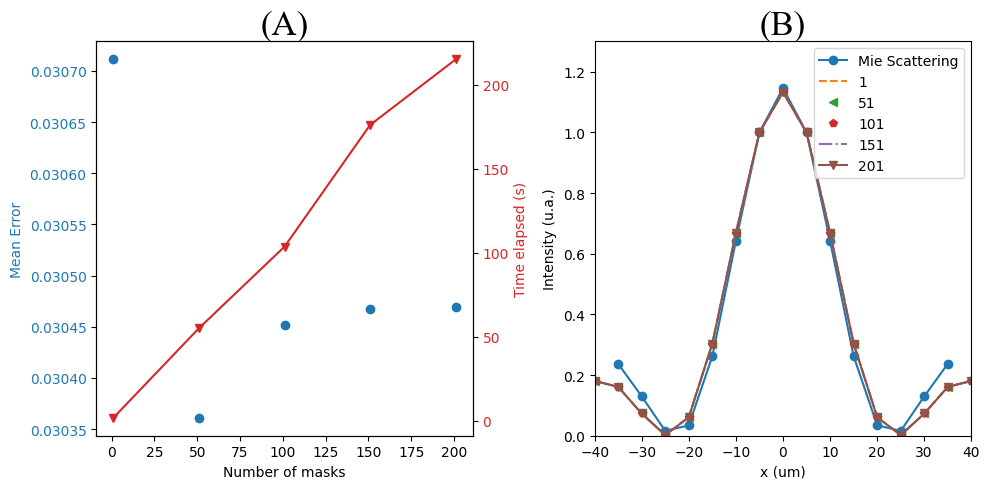

In [53]:
vard=3.5
# Create the first plot with y1 data
fig, [ax1,ax3] = plt.subplots(1,2,figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Number of masks')
ax1.set_ylabel('Mean Error', color=color)
ax1.plot([1,51,101,151,201], mean_errors5,'o', color=color)
#ax1.errorbar([1,51,101,151,201], mean_errors5,yerr=mean_std5, fmt='.k')
#ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)

# Create the secondary y-axis for y2 data
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Time elapsed (s)', color=color)
ax2.plot([1,51,101,151,201], np.abs(time_M5), '-v',color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
ax1.set_title('(A)',fontname='Times New Roman', fontsize=25)
#plt.title(f'(N={N}, vard = {vard}, z = {z} mm, and R = {R1} mm)')

ax3.plot(x,U/U[len(U)//2+1],'-o',label='Mie Scattering')
ax3.plot(x00,abs(U01[N//2])**2/abs(U01[N//2][N//2+1])**2, '--',label='1')
ax3.plot(x00,abs(U051[N//2])**2/abs(U051[N//2][N//2+1])**2, '<',label='51')
ax3.plot(x00,abs(U0101[N//2])**2/abs(U0101[N//2][N//2+1])**2, 'p',label='101')

ax3.plot(x00,abs(U0151[N//2])**2/abs(U0151[N//2][N//2+1])**2 , '-.',label='151')
ax3.plot(x00,abs(U0201[N//2])**2/abs(U0201[N//2][N//2+1])**2 , '-v',label='201')

ax3.set_xlim(-40,40)
#plt.yscale('log')
ax3.set_ylim(0,1.3)
ax3.legend()
ax3.set_ylabel('Intensity (u.a.)')
ax3.set_xlabel('x (um)')
ax3.set_title('(B)',fontname='Times New Roman', fontsize=25)


# Show the plot,
plt.tight_layout()
plt.savefig('Compara_Esf2.png',dpi=300)
